In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Loading the dataset
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [3]:
# Dropping the 'Unnamed: 32' column
df = df.drop(columns=['Unnamed: 32', 'id'])

In [4]:
# One hot encoding for categorical data
df = pd.get_dummies(data=df, drop_first=True)

In [5]:
# Splitting the data into features and target variable
X = df.drop(columns='diagnosis_M')
y = df['diagnosis_M']

In [6]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Training and evaluating Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Model
Accuracy: 0.9737
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98        71
        True       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [10]:
# Training and evaluating Decision Tree model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Decision Tree Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Model
Accuracy: 0.9474
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96        71
        True       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [11]:
# Training and evaluating Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model
Accuracy: 0.9649
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



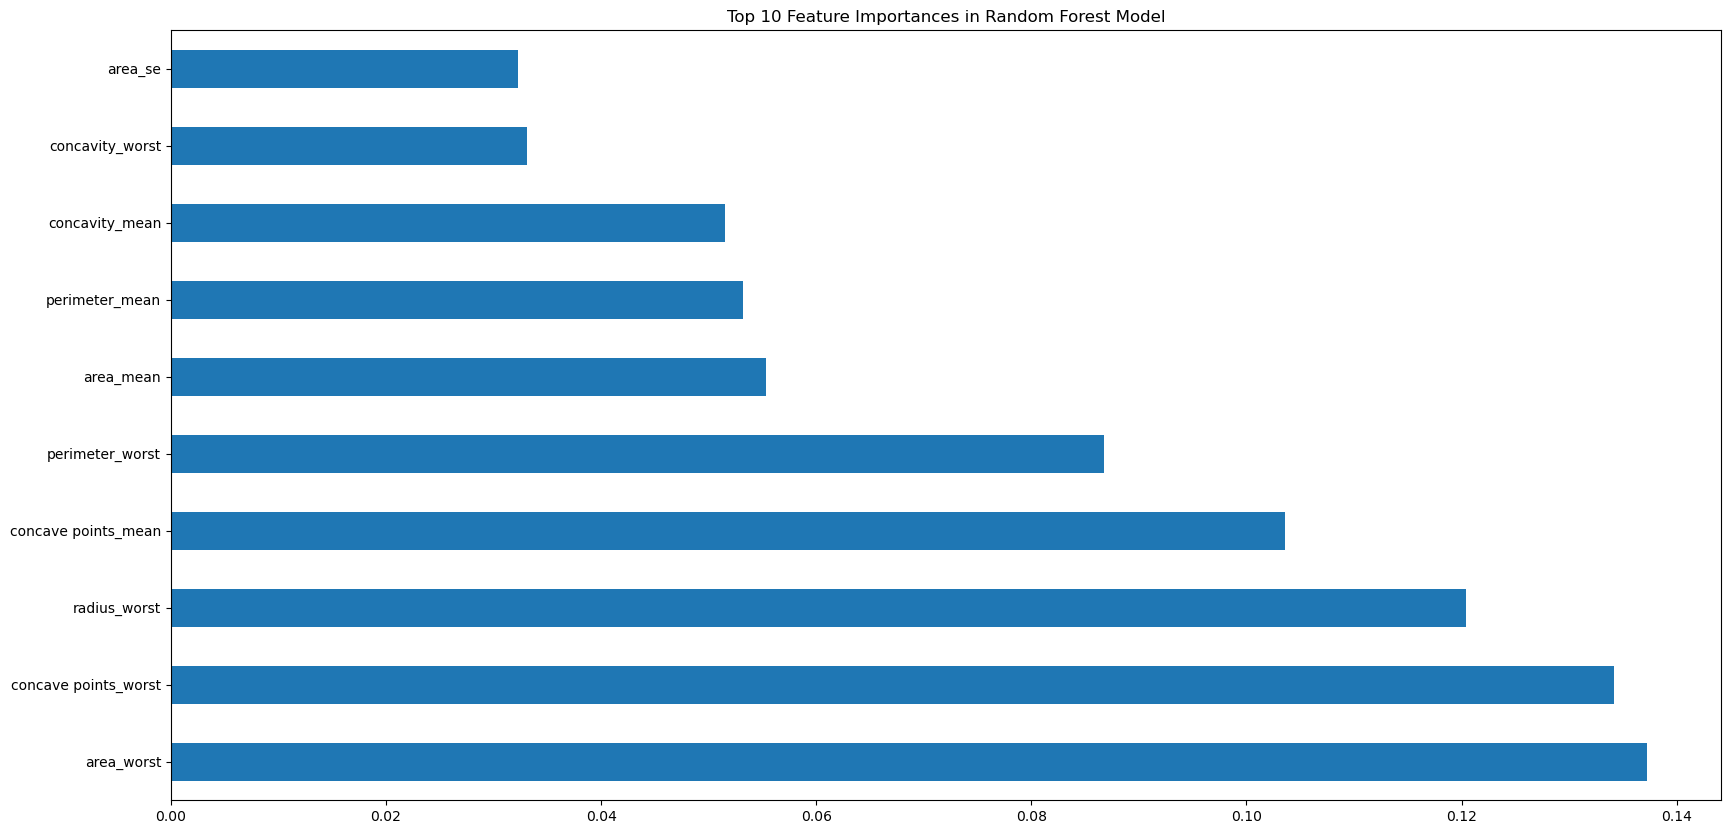

In [12]:
# Visualizing feature importance for Random Forest model
plt.figure(figsize=(20,10))
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.show()